In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import streamlit as st
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [44]:
df = pd.read_csv("archive/KAG_conversion_data.csv")

Contenido

Los datos utilizados en este proyecto proceden de una campaña publicitaria en redes sociales de una organización anónima. El archivo de datos puede descargarse desde aquí. El archivo conversion_data.csv contiene 1143 observaciones en 11 variables. A continuación se describen las variables.

1.) ad_id: un ID único para cada anuncio.

2.) xyz_campaign_id: un ID asociado a cada campaña publi

3.) fb_campaign_id: un ID asociado a la forma en que Facebook realiza el seguimiento de cada campaña.

4.) age: edad de la persona a la que se muestra el anuncio.

5.) género: género de la persona a la que se muestra el anuncio.

6.) interés: un código que especifica la categoría a la que pertenece el interés de la persona (los intereses son los mencionados en el perfil público de Facebook de la persona).

7.) impresiones: el número de veces que se ha mostrado el anuncio.

8.) Clics: número de clics en ese anuncio.

9.) Gastado: Cantidad pagada por la empresa xyz a Facebook, para mostrar ese anuncio.

10.) Conversión total: Número total de personas que preguntaron por el producto después de ver el anuncio.

11.) Conversión aprobada: Número total de personas que compraron el producto después de ver el anuncio.

In [45]:
df.info() #no hay nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [46]:
df["xyz_campaign_id"].value_counts().reset_index() # 3 camapañas de diferentes productos o bien campañas del mismo producto pero en diferente tiempo.. ) 

,xyz_campaign_id,count
0,1178,625
1,936,464
2,916,54


In [47]:
len(df["ad_id"].unique()) # 1143 anuncios diferentes

1143

In [48]:
len(df["fb_campaign_id"].unique()) #691 tipos de anuncios de facb

691

In [49]:
#vemos el df normal.
df["age"].value_counts().reset_index() #4

,age,count
0,30-34,426
1,45-49,259
2,35-39,248
3,40-44,210


In [50]:
df["gender"].value_counts().reset_index()

,gender,count
0,M,592
1,F,551


In [51]:
len(df["interest"].unique()) #hay 40 grupos de intereses que atacan este dataset

40

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,777632.50,1121185.00,1121804.500,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,936.00,1178.00,1178.000,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,115716.00,144549.00,144657.500,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,16.00,25.00,31.000,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,6503.50,51509.00,221769.000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,1.00,8.00,37.500,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,1.48,12.37,60.025,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,1.00,1.00,3.000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.00,1.00,1.000,2.100000e+01


In [53]:
more_1_ad_campaign = df["fb_campaign_id"].value_counts()[df["fb_campaign_id"].value_counts()>1].index.to_list() 
df[df["fb_campaign_id"].isin(more_1_ad_campaign)].describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,680.0,1.033102e+06,149867.883880,708815.0,951237.75,1121378.50,1.121812e+06,1.122313e+06
xyz_campaign_id,680.0,1.111424e+03,108.612172,916.0,936.00,1178.00,1.178000e+03,1.178000e+03
fb_campaign_id,680.0,1.365761e+05,13429.952731,103928.0,123633.50,144586.50,1.446590e+05,1.447420e+05
interest,680.0,2.555000e+01,15.296784,2.0,16.00,22.00,2.900000e+01,6.600000e+01
Impressions,680.0,2.527927e+05,354816.015624,152.0,24458.75,116687.00,3.215425e+05,3.052003e+06
Clicks,680.0,4.507500e+01,64.366279,0.0,3.00,20.00,5.525000e+01,4.210000e+02
Spent,680.0,7.046941e+01,99.044556,0.0,4.76,33.78,8.945250e+01,6.399500e+02
Total_Conversion,680.0,3.394118e+00,5.043314,0.0,1.00,2.00,4.000000e+00,6.000000e+01
Approved_Conversion,680.0,1.152941e+00,2.028550,0.0,0.00,1.00,1.000000e+00,2.100000e+01


In [54]:
df[~((df["Total_Conversion"] >= 1) & (df["Spent"] == 0))]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [55]:
df[~df["fb_campaign_id"].isin(more_1_ad_campaign)].describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,463.0,919936.131749,228864.106787,708746.0,738642.5,779995.0,1121728.0,1.314415e+06
xyz_campaign_id,463.0,1002.699784,110.375797,916.0,936.0,936.0,1178.0,1.178000e+03
fb_campaign_id,463.0,129683.231102,27302.452490,103916.0,109858.0,116123.0,144645.0,1.799820e+05
interest,463.0,43.365011,35.531442,2.0,19.0,27.0,64.0,1.140000e+02
Impressions,463.0,89710.140389,202273.266114,87.0,2185.5,8410.0,70845.0,1.357386e+06
Clicks,463.0,16.228942,37.625914,0.0,0.0,2.0,10.0,2.520000e+02
Spent,463.0,23.295961,54.091659,0.0,0.0,2.8,15.1,3.581900e+02
Total_Conversion,463.0,2.064795,3.354927,0.0,1.0,1.0,1.0,3.100000e+01
Approved_Conversion,463.0,0.637149,1.121456,0.0,0.0,0.0,1.0,1.000000e+01


In [56]:
# de los 3 describe: no se puede ver la comparativa entre las campañas de fb si no hacemos feauture engeneering 

# Coste por click cada mil impresiones --> (Spent / impression) * 1000
# CTR --> (Clicks/impresiones)
# Coste por lead (conversion) --> Spent / Total_Conversion
# Coste por venta --> Spent/Approved_Conversion
# Tasa de clicks --> clicks/Impressions
# Porcentaje de Total_Conversion en base a Spent   -->  Spent/Total_conversion
# porcentaje de Total_Conversion en base a Clicks  --> TOtal_Conversion / Clicks 
# Tasa conversion aprovada--> Approved_Conversion / Clicks
# Porcentaje de Approved_Conversion en base a Total_Conversion --> Approved_Conversion/ Total_Conversion

# en el df normal, vemos que hay anuncios con 0€ gasto, lo cual no tiene mucho sentido A PRIORI. ¿Habrá clicks con 0 € de gasto? si es así el dato está contaminado y deberemos actuar conforme creamos:
# eliminar registro o poner un valor adecuado.

#posteriormente para hacer recomendaciones hay dos puntos a tener en cuentas. Sabemos que hay 3 campañas. 
# Si son campañas que anuncian productos muy diferentes no se puede hacer recomendaciones basadas en todo el dataset si no sus propias camp para optimizarlos. Deberíamos tener esto en cuenta si queremos generalizar una optimizacion.
# si son campañas que estas promocionando productos similares si podemos hacer la comparativa.

# en cualquier caso si debemos saber que lo mas importante son el publico donde va dirigido (intereses y edad) ya que hay que hacer optimizaciones en base a cada publico, eso debería ser lo ideal. Habrías que ver métricass 

In [57]:
df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [58]:
# ¿entender datos?
df[(df["xyz_campaign_id"] == 916) & (df["age"] == "30-34") & (df["gender"] == "M")].sort_values(by='interest')
#no se entiende que haya a veces diferentes anuncios con distintito identificador para personas con mismos intereses y iguales caracteristicas.(15,20,28,31).
# Podemos suponer que pueden ser lanzadas en diferentes dias o tiempo. Diferente objetivo: Campaña de marca vs comercial, etc. Puede ser que  haya alguna egmentación adicional no visible.


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
11,709023,916,103962,30-34,M,7,735,0,0.00,1,0
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
12,709038,916,103965,30-34,M,16,5117,0,0.00,1,0
13,709040,916,103965,30-34,M,16,5120,0,0.00,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
14,709059,916,103968,30-34,M,20,14669,7,10.28,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0


In [59]:
# Total_Conversion == 1 y 0 segun el gasto.  
# integridad de los datos entre gasto y clicks correcta

df[(df["Spent"] == 0) & (df["Clicks"] != 0)]


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion


In [60]:
# integridad de los datos entre Total_Conversion y Approved_Conversion correcta

df[(df["Total_Conversion"] == 0) & (df["Approved_Conversion"] != 0)]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion


In [61]:
df[df["Total_Conversion"] == 0] #es muy raro que no haya conversiones solo en unos pocos valores

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
95,735033,936,108792,35-39,F,36,652,0,0.000000,0,0
184,747968,936,110962,35-39,F,21,512,0,0.000000,0,0
221,776476,936,115510,30-34,M,16,43756,5,5.440000,0,0
510,951853,936,123736,30-34,F,20,529,0,0.000000,0,0
655,1121352,1178,144582,35-39,M,25,368986,59,100.289999,0,0
866,1121820,1178,144660,30-34,F,28,11471,1,1.570000,0,0
981,1122146,1178,144714,40-44,F,32,319501,79,111.650000,0,0
990,1122182,1178,144720,40-44,F,7,40801,12,15.920000,0,0


In [62]:
 #es bastante raro que esto pase. Ventanas de atribucion. Deberíamos homegeneizar todos los datos, si en los demas ads, están
# así entonces no pasa nada. Podríamos decir que si hay compra, son los más rentables. 

In [63]:
df[(df["Total_Conversion"] >= 1) & (df["Spent"] == 0) & (df["Approved_Conversion"]>=1)]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
5,708820,916,103929,30-34,M,29,1915,0,0.0,1,1
15,709105,916,103976,30-34,M,28,1241,0,0.0,1,1
17,709124,916,103979,30-34,M,31,1024,0,0.0,1,1
20,709320,916,104012,35-39,M,15,1422,0,0.0,1,1
24,709328,916,104013,35-39,M,16,3332,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
500,951641,936,123700,40-44,F,2,87,0,0.0,1,1
517,952100,936,123777,35-39,F,29,810,0,0.0,1,1
520,1121094,1178,144531,30-34,M,10,24362,0,0.0,1,1
599,1121252,1178,144565,30-34,M,63,11139,0,0.0,1,1


Text(0.5, 0, 'Interest')

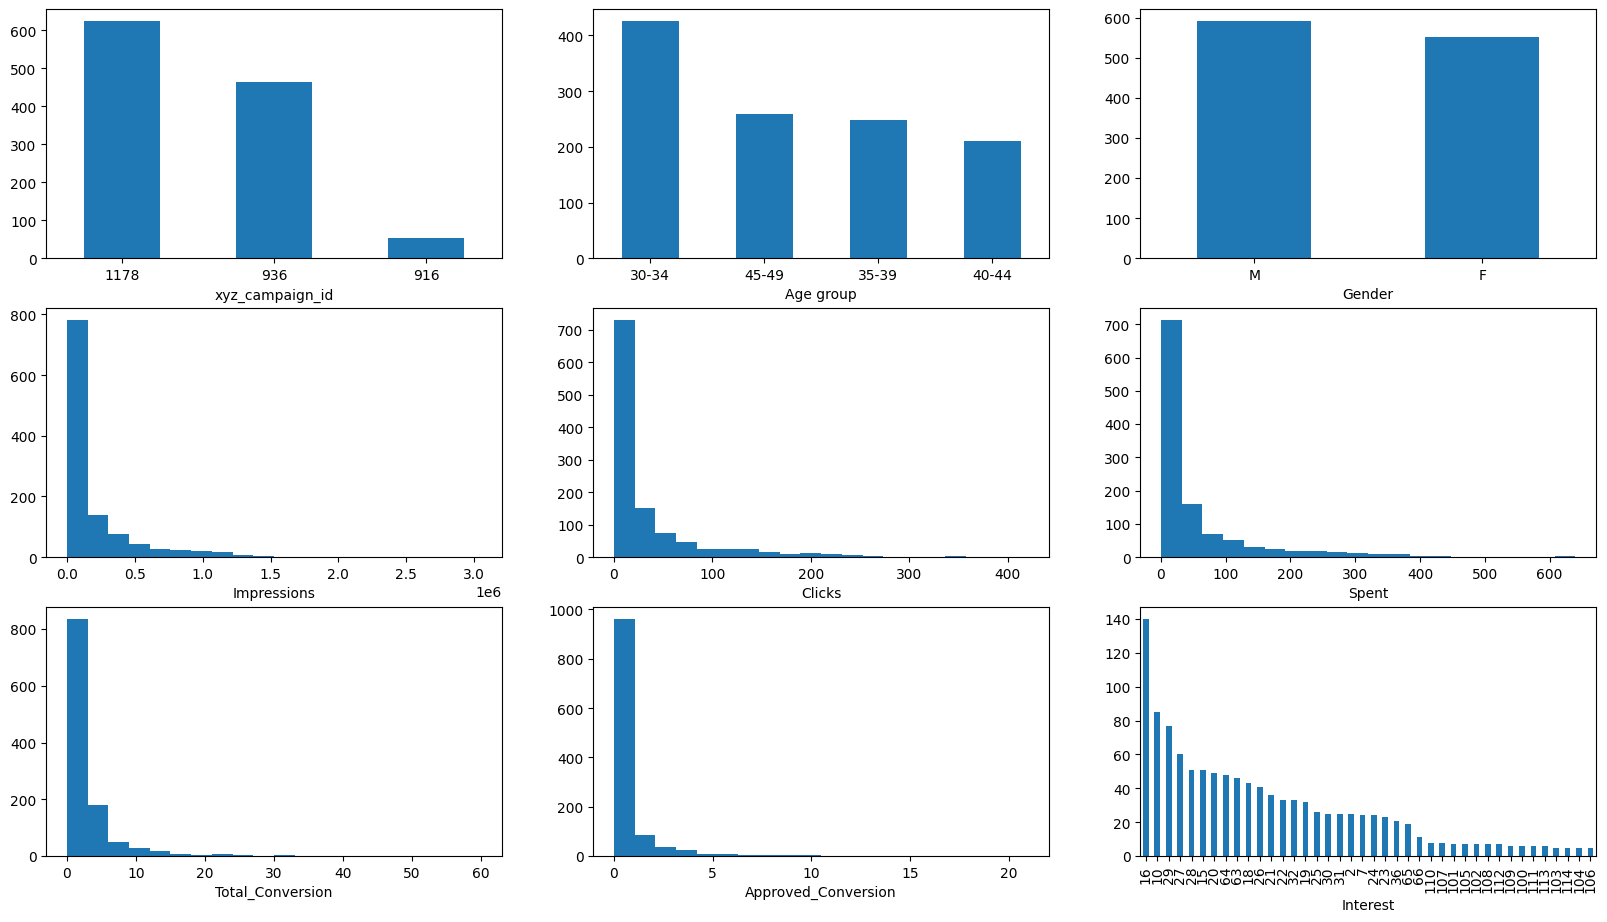

In [64]:
fig, ax = plt.subplots(3, 3, figsize=(20,11))

df["xyz_campaign_id"].value_counts().plot(kind="bar", ax=ax[0, 0])
ax[0, 0].tick_params(labelrotation=0)
ax[0, 0].set_xlabel("xyz_campaign_id")

df["age"].value_counts().plot(kind="bar", ax=ax[0, 1])
ax[0, 1].tick_params(labelrotation=0)
ax[0, 1].set_xlabel("Age group")


df["gender"].value_counts().plot(kind="bar", ax=ax[0, 2])
ax[0, 2].tick_params(labelrotation=0)
ax[0, 2].set_xlabel("Gender")

df["Impressions"].hist(ax=ax[1, 0], bins=20)
ax[1, 0].grid(False)
ax[1, 0].set_xlabel("Impressions")

df["Clicks"].hist(ax=ax[1, 1], bins=20)
ax[1, 1].grid(False)
ax[1, 1].set_xlabel("Clicks")

df["Spent"].hist(ax=ax[1, 2], bins=20)
ax[1, 2].grid(False)
ax[1, 2].set_xlabel("Spent")

df["Total_Conversion"].hist(ax=ax[2, 0], bins=20)
ax[2, 0].grid(False)
ax[2, 0].set_xlabel("Total_Conversion")

df["Approved_Conversion"].hist(ax=ax[2, 1], bins=20)
ax[2, 1].grid(False)
ax[2, 1].set_xlabel("Approved_Conversion")

df["interest"].value_counts().plot(kind="bar", ax=ax[2, 2])
ax[2, 2].grid(False)
ax[2, 2].set_xlabel("Interest")



In [65]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


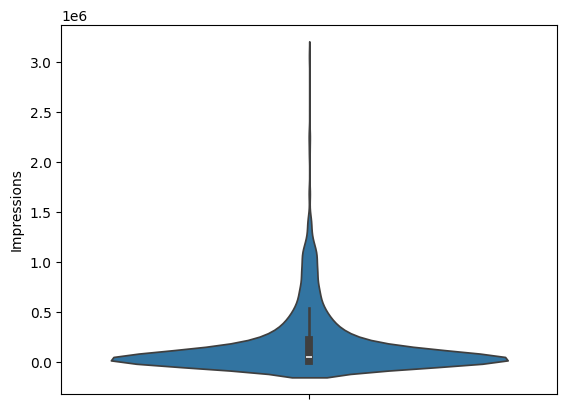

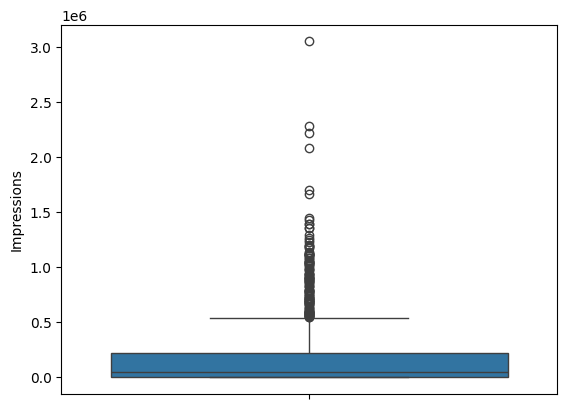

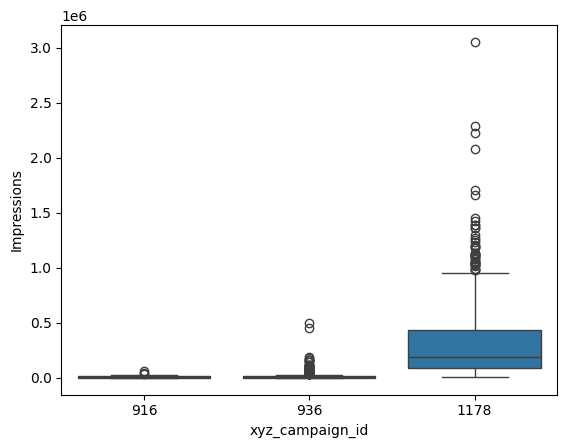

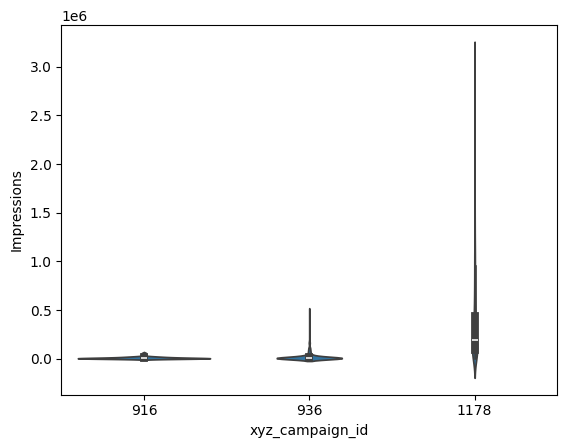

In [66]:

sns.violinplot(y=df["Impressions"])
plt.show()
sns.boxplot(y = df["Impressions"])
plt.show()
sns.boxplot(x = df["xyz_campaign_id"],
            y = df["Impressions"])
plt.show()
sns.violinplot(x=df["xyz_campaign_id"] , y=df["Impressions"])
plt.show()

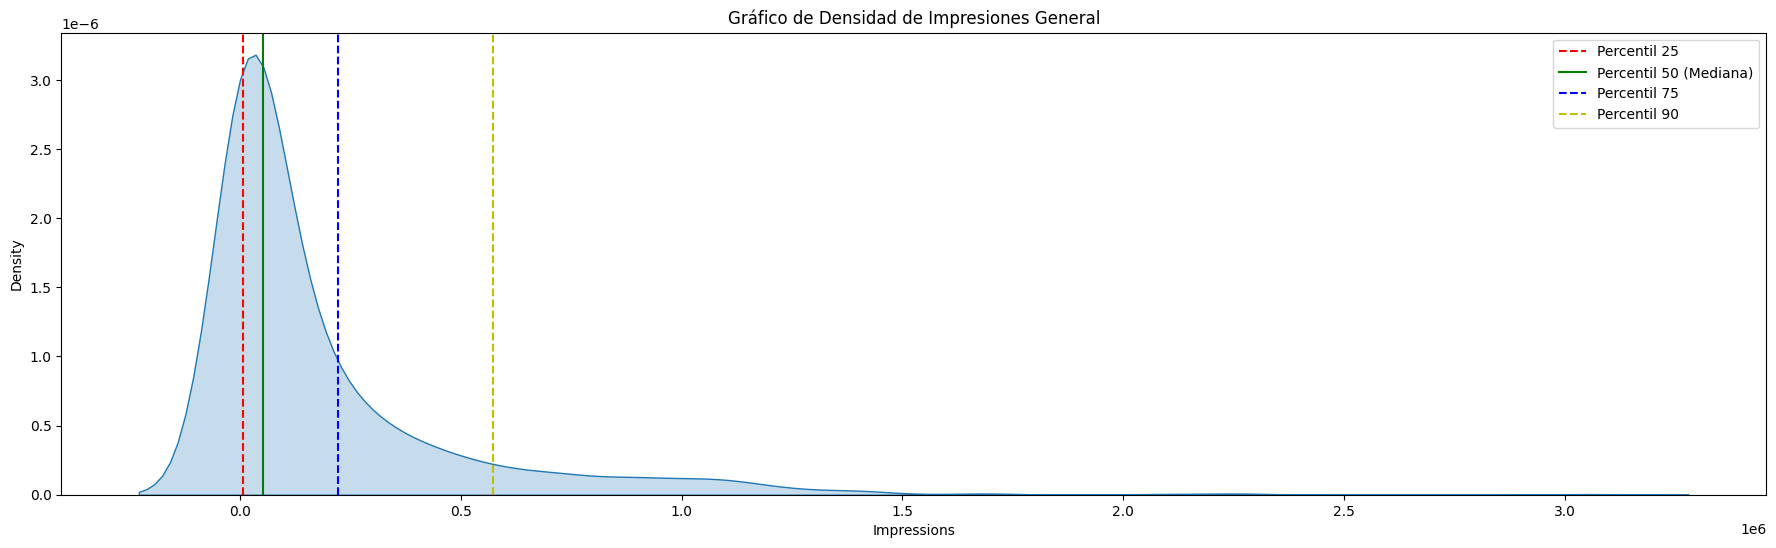

In [67]:
# Calcular percentiles
p25 = np.percentile(df["Impressions"], 25)
p50 = np.percentile(df["Impressions"], 50)
p75 = np.percentile(df["Impressions"], 75)
p95 = np.percentile(df["Impressions"], 90)


# Crear la figura con un tamaño más ancho
plt.figure(figsize=(22, 6))  # Ajusta el tamaño a 12x6 pulgadas

# Crear gráfico de densidad
sns.kdeplot(data=df, x="Impressions", fill=True)
plt.title('Gráfico de Densidad de Impresiones General')

# Agregar líneas verticales para percentiles
plt.axvline(p25, color='r', linestyle='--', label='Percentil 25')
plt.axvline(p50, color='g', linestyle='-', label='Percentil 50 (Mediana)')
plt.axvline(p75, color='b', linestyle='--', label='Percentil 75')
plt.axvline(p95, color='y', linestyle='--', label='Percentil 90')


# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()


In [68]:

# Coste por mil impresiones (CPM)
df['CPM'] = np.where(df['Impressions'] != 0, (df['Spent'] / df['Impressions']) * 1000, 0)

# Coste por lead (CPL)
df['CPL'] = np.where(df['Total_Conversion'] != 0, df['Spent'] / df['Total_Conversion'], 0)

# Coste por venta (CPA)
df['CPA'] = np.where(df['Approved_Conversion'] != 0, df['Spent'] / df['Approved_Conversion'], 0)

# Tasa de clics (CTR)
df['CTR'] = np.where(df['Impressions'] != 0, (df['Clicks'] / df['Impressions']) * 100, 0)

# Coste por clic (CPC)
df['CPC'] = np.where(df['Clicks'] != 0, df['Spent'] / df['Clicks'], 0)

# Tasa de conversión (Conversion Rate) para leads y ventas
df['Conversion_Rate_Lead'] = np.where(df['Impressions'] != 0, (df['Total_Conversion'] / df['Impressions']) * 100, 0)
df['Conversion_Rate_Sale'] = np.where(df['Impressions'] != 0, (df['Approved_Conversion'] / df['Impressions']) * 100, 0)

# Porcentaje de Total_Conversion en base a Spent
df['Pct_Spent_per_Conversion'] = np.where(df['Total_Conversion'] != 0, df['Spent'] / df['Total_Conversion'], 0)

# Porcentaje de Total_Conversion en base a Clicks
df['Pct_Conversion_per_Click'] = np.where(df['Clicks'] != 0, df['Total_Conversion'] / df['Clicks'], 0)

# Tasa de conversión aprobada
df['Approved_Conversion_Rate'] = np.where(df['Clicks'] != 0, df['Approved_Conversion'] / df['Clicks'], 0)

# Porcentaje de Approved_Conversion en base a Total_Conversion
df['Pct_Approved_Conversion'] = np.where(df['Total_Conversion'] != 0, df['Approved_Conversion'] / df['Total_Conversion'], 0)

df.head()


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,...,CPL,CPA,CTR,CPC,Conversion_Rate_Lead,Conversion_Rate_Sale,Pct_Spent_per_Conversion,Pct_Conversion_per_Click,Approved_Conversion_Rate,Pct_Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,...,0.715,1.43,0.013605,1.43,0.027211,0.013605,0.715,2.0,1.0,0.5
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,...,0.910,0.00,0.011198,0.91,0.011198,0.000000,0.910,1.0,0.0,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,...,0.000,0.00,0.000000,0.00,0.144300,0.000000,0.000,0.0,0.0,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,...,1.250,0.00,0.023480,1.25,0.023480,0.000000,1.250,1.0,0.0,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,...,1.290,1.29,0.024195,1.29,0.024195,0.024195,1.290,1.0,1.0,1.0


In [69]:
df[df["Spent"] ==0].sort_values(by="Impressions",ascending=False) #ventanas de atribucion hay que tener en cuenta esto para las predicciones.

#no lo cambiamos porque se supone que no solo en las que están a 0 de clicks pasa, también puede pasar con las conversiones que tiene 100 clicks.

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,...,CPL,CPA,CTR,CPC,Conversion_Rate_Lead,Conversion_Rate_Sale,Pct_Spent_per_Conversion,Pct_Conversion_per_Click,Approved_Conversion_Rate,Pct_Approved_Conversion
520,1121094,1178,144531,30-34,M,10,24362,0,0.0,1,...,0.0,0.0,0.0,0.0,0.004105,0.004105,0.0,0.0,0.0,1.0
587,1121224,1178,144558,30-34,M,31,14289,0,0.0,1,...,0.0,0.0,0.0,0.0,0.006998,0.000000,0.0,0.0,0.0,0.0
599,1121252,1178,144565,30-34,M,63,11139,0,0.0,1,...,0.0,0.0,0.0,0.0,0.008977,0.008977,0.0,0.0,0.0,1.0
618,1121286,1178,144571,30-34,M,66,10991,0,0.0,1,...,0.0,0.0,0.0,0.0,0.009098,0.000000,0.0,0.0,0.0,0.0
222,776477,936,115510,30-34,M,16,9982,0,0.0,1,...,0.0,0.0,0.0,0.0,0.010018,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,950550,936,123519,30-34,M,30,219,0,0.0,1,...,0.0,0.0,0.0,0.0,0.456621,0.000000,0.0,0.0,0.0,0.0
462,950787,936,123558,30-34,M,27,199,0,0.0,1,...,0.0,0.0,0.0,0.0,0.502513,0.000000,0.0,0.0,0.0,0.0
454,950629,936,123532,30-34,M,65,152,0,0.0,1,...,0.0,0.0,0.0,0.0,0.657895,0.657895,0.0,0.0,0.0,1.0
455,950631,936,123532,30-34,M,65,152,0,0.0,1,...,0.0,0.0,0.0,0.0,0.657895,0.657895,0.0,0.0,0.0,1.0


In [70]:
#hacer una landing en base embudos:
# 1: filtros (campaña, generos, edad e intereses)
# 2 embudo 
# engagement: Primera fase del anuncio es lo que tiene que funcionar mejor. Impresiones, CTR, CPM, CPC --> Mejors en segmentacion, creatividad, intereses.
# leads: Aqui ya nos metemos en el por conversiones de landings. CPL, Conversion_Rate_Lead, Pct_Spent_per_Conversion
# Costumers: esto ya es la fase de ventas: CPA,Conversion_Rate_Sale Approved_Conversion_Rate Pct_Approved_Conversion --> Estrategias para ver que es lo que falla en ventas. 

# 3: funcionalidad para ver si un anuncio tiene margen de mejora. 
# 4: predicción de alguna variable de interés

In [71]:
df["age"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [72]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,...,CPL,CPA,CTR,CPC,Conversion_Rate_Lead,Conversion_Rate_Sale,Pct_Spent_per_Conversion,Pct_Conversion_per_Click,Approved_Conversion_Rate,Pct_Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,...,0.715000,1.430000,0.013605,1.430000,0.027211,0.013605,0.715000,2.000000,1.000000,0.500000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,...,0.910000,0.000000,0.011198,0.910000,0.011198,0.000000,0.910000,1.000000,0.000000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,...,0.000000,0.000000,0.000000,0.000000,0.144300,0.000000,0.000000,0.000000,0.000000,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,...,1.250000,0.000000,0.023480,1.250000,0.023480,0.000000,1.250000,1.000000,0.000000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,...,1.290000,1.290000,0.024195,1.290000,0.024195,0.024195,1.290000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,...,27.553077,179.094999,0.022305,1.421389,0.001151,0.000177,27.553077,0.051587,0.007937,0.153846
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,...,57.960001,0.000000,0.018822,1.449000,0.000471,0.000000,57.960001,0.025000,0.000000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,...,20.145000,0.000000,0.018478,1.438929,0.001320,0.000000,20.145000,0.071429,0.000000,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,...,24.838750,99.355000,0.017083,1.471926,0.001012,0.000253,24.838750,0.059259,0.014815,0.250000


In [73]:
df.iloc[:,6:].describe().T.drop("min",axis=1)

,count,mean,std,25%,50%,75%,max
Impressions,1143.0,186732.132983,312762.183208,6503.500000,51509.000000,221769.000000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,1.000000,8.000000,37.500000,4.210000e+02
Spent,1143.0,51.360656,86.908418,1.480000,12.370000,60.025000,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,1.000000,1.000000,3.000000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.000000,1.000000,1.000000,2.100000e+01
CPM,1143.0,0.239387,0.160908,0.148742,0.248816,0.332700,1.504237e+00
CPL,1143.0,16.016721,24.297504,1.380000,8.190000,21.229286,3.329900e+02
CPA,1143.0,20.719900,43.761027,0.000000,0.000000,24.075000,3.524500e+02
CTR,1143.0,0.016420,0.011506,0.010022,0.015981,0.023364,1.059322e-01
CPC,1143.0,1.227812,0.614889,1.234500,1.450000,1.600000,2.212000e+00


In [74]:
import numpy as np
import pandas as pd

def detect_outliers_mad(df, column, threshold=3.5):

    numeric_data = pd.to_numeric(df[column], errors='coerce')
    
    
    if len(numeric_data) == 0:
        return df, np.nan  # Retorna el DataFrame original si no hay datos válidos
    
    median = numeric_data.median()
    
    # Calculate MAD
    mad = np.median(np.abs(numeric_data - median))
    
    if mad == 0:
        return df, 0  # Retorna el DataFrame original si MAD es 0
    
    # Calculate the modified Z-score
    modified_z_score = 0.6745 * (numeric_data - median) / mad
    
    # Filter out outliers
    mask = abs(modified_z_score) < threshold
    df_no_outliers = df[mask]
    
    return df_no_outliers, mad


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ad_id                     1143 non-null   int64  
 1   xyz_campaign_id           1143 non-null   int64  
 2   fb_campaign_id            1143 non-null   int64  
 3   age                       1143 non-null   object 
 4   gender                    1143 non-null   object 
 5   interest                  1143 non-null   int64  
 6   Impressions               1143 non-null   int64  
 7   Clicks                    1143 non-null   int64  
 8   Spent                     1143 non-null   float64
 9   Total_Conversion          1143 non-null   int64  
 10  Approved_Conversion       1143 non-null   int64  
 11  CPM                       1143 non-null   float64
 12  CPL                       1143 non-null   float64
 13  CPA                       1143 non-null   float64
 14  CTR     

In [76]:

df_filtrado = df.iloc[:,6:]
cols = df_filtrado.columns.to_list()

df_mad, valores = detect_outliers_mad(df_filtrado,"CPL")
df_mad 

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CPL,CPA,CTR,CPC,Conversion_Rate_Lead,Conversion_Rate_Sale,Pct_Spent_per_Conversion,Pct_Conversion_per_Click,Approved_Conversion_Rate,Pct_Approved_Conversion
0,7350,1,1.430000,2,1,0.194558,0.715000,1.430000,0.013605,1.430000,0.027211,0.013605,0.715000,2.000000,1.000000,0.500000
1,17861,2,1.820000,2,0,0.101898,0.910000,0.000000,0.011198,0.910000,0.011198,0.000000,0.910000,1.000000,0.000000,0.000000
2,693,0,0.000000,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.144300,0.000000,0.000000,0.000000,0.000000,0.000000
3,4259,1,1.250000,1,0,0.293496,1.250000,0.000000,0.023480,1.250000,0.023480,0.000000,1.250000,1.000000,0.000000,0.000000
4,4133,1,1.290000,1,1,0.312122,1.290000,1.290000,0.024195,1.290000,0.024195,0.024195,1.290000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,212508,33,47.690000,4,1,0.224415,11.922500,47.690000,0.015529,1.445152,0.001882,0.000471,11.922500,0.121212,0.030303,0.250000
1138,1129773,252,358.189997,13,2,0.317046,27.553077,179.094999,0.022305,1.421389,0.001151,0.000177,27.553077,0.051587,0.007937,0.153846
1140,151531,28,40.289999,2,0,0.265886,20.145000,0.000000,0.018478,1.438929,0.001320,0.000000,20.145000,0.071429,0.000000,0.000000
1141,790253,135,198.710001,8,2,0.251451,24.838750,99.355000,0.017083,1.471926,0.001012,0.000253,24.838750,0.059259,0.014815,0.250000


In [77]:
valores

np.float64(8.189999896666667)

In [78]:
series =pd.to_numeric(df["Total_Conversion"], errors='coerce')*0.6745
df[abs(series) < 1]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,...,CPL,CPA,CTR,CPC,Conversion_Rate_Lead,Conversion_Rate_Sale,Pct_Spent_per_Conversion,Pct_Conversion_per_Click,Approved_Conversion_Rate,Pct_Approved_Conversion
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,...,0.000000,0.00,0.000000,0.000000,0.144300,0.000000,0.000000,0.000000,0.000000,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,...,1.250000,0.00,0.023480,1.250000,0.023480,0.000000,1.250000,1.000000,0.000000,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,...,1.290000,1.29,0.024195,1.290000,0.024195,0.024195,1.290000,1.000000,1.000000,1.0
5,708820,916,103929,30-34,M,29,1915,0,0.000000,1,...,0.000000,0.00,0.000000,0.000000,0.052219,0.052219,0.000000,0.000000,0.000000,1.0
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,...,4.770000,0.00,0.019212,1.590000,0.006404,0.000000,4.770000,0.333333,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1314385,1178,179952,35-39,F,114,90470,11,16.730000,1,...,16.730000,16.73,0.012159,1.520909,0.001105,0.001105,16.730000,0.090909,0.090909,1.0
1117,1314388,1178,179955,40-44,F,102,329333,48,67.609999,1,...,67.609999,0.00,0.014575,1.408542,0.000304,0.000000,67.609999,0.020833,0.000000,0.0
1126,1314397,1178,179964,40-44,F,111,402975,83,120.899998,1,...,120.899998,0.00,0.020597,1.456626,0.000248,0.000000,120.899998,0.012048,0.000000,0.0
1132,1314404,1178,179971,45-49,F,103,71982,11,16.340001,1,...,16.340001,0.00,0.015282,1.485455,0.001389,0.000000,16.340001,0.090909,0.000000,0.0


In [79]:


#Se puede hacer con menos columnas pero dejamos todas.

def encoder_one_hot(df,columns_to_encode):
    encoder = OneHotEncoder()

    encoded_cols = encoder.fit_transform(df[columns_to_encode])

    new_columns = encoder.get_feature_names_out(columns_to_encode)

    # Nuevo DataFrame con las columnas codificadas
    encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=new_columns, index=df.index)

    # Concatenar el DataFrame original con las nuevas columnas codificadas
    result_df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

    return result_df

columns_to_encode = ['xyz_campaign_id','age', 'gender', 'interest']

df_to_encode = df.drop(["ad_id","fb_campaign_id"],axis=1)

df_result = encoder_one_hot(df_to_encode,columns_to_encode)

In [81]:
[col for col in df_result.columns if not col.startswith("interest")]

['Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion',
 'CPM',
 'CPL',
 'CPA',
 'CTR',
 'CPC',
 'Conversion_Rate_Lead',
 'Conversion_Rate_Sale',
 'Pct_Spent_per_Conversion',
 'Pct_Conversion_per_Click',
 'Approved_Conversion_Rate',
 'Pct_Approved_Conversion',
 'xyz_campaign_id_916',
 'xyz_campaign_id_936',
 'xyz_campaign_id_1178',
 'age_30-34',
 'age_35-39',
 'age_40-44',
 'age_45-49',
 'gender_F',
 'gender_M']

In [88]:
#df_result.to_csv("archive/datos_one_hot.csv",index=False)
df2 = pd.read_csv("archive/datos_one_hot.csv")

In [103]:
cols = [col for col in df2.columns if "interest" not in col]
df2_no_int = df2[cols]

In [112]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def crear_heatmap_correlaciones3(df, variables_x=None, variables_y=None):
    # Calcular la matriz de correlación completa
    corr_matrix = df.corr()
    
    # Si no se especifican variables, usar todas
    if variables_x is None:
        variables_x = corr_matrix.columns
    if variables_y is None:
        variables_y = corr_matrix.columns
    
    # Filtrar la matriz de correlación
    corr_filtered = corr_matrix.loc[variables_y, variables_x]
    
    # Crear el heatmap
    fig = go.Figure(data=go.Heatmap(
        z=corr_filtered.values,  # Valores de la matriz de correlación filtrada
        x=corr_filtered.columns,  # Nombres de las columnas para el eje X
        y=corr_filtered.index,  # Nombres de las columnas para el eje Y
        colorscale='Viridis',  # Escala de colores
        hoverongaps=False,  # Para evitar gaps en los hover labels
        hovertemplate='X: %{x}<br>Y: %{y}<br>Correlación: %{z}<extra></extra>'  # Texto personalizado para hover
    ))

    # Personalización del layout
    fig.update_layout(
        title='Heatmap de Correlaciones',
        xaxis_title='Variables X',
        yaxis_title='Variables Y',
        coloraxis_colorbar=dict(
            title="Correlación"
        )
    )
    
    fig.show()
crear_heatmap_correlaciones3(df2_no_int,
                             variables_x=['xyz_campaign_id_916','xyz_campaign_id_936', 'xyz_campaign_id_1178','gender_F','gender_M'],
                            variables_y=['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','CPM','CPL','CPA','CTR','CPC'])



In [111]:
def crear_heatmap_correlaciones3(df, variables_x=None, variables_y=None):
    # Calcular la matriz de correlación completa
    corr_matrix = df.corr()
    
    # Si no se especifican variables, usar todas
    if variables_x is None:
        variables_x = corr_matrix.columns
    if variables_y is None:
        variables_y = corr_matrix.columns
    
    # Filtrar la matriz de correlación
    corr_filtered = corr_matrix.loc[variables_y, variables_x]
    
    # Crear el heatmap
    fig = go.Figure(data=go.Heatmap(
        z=corr_filtered.values,  # Valores de la matriz de correlación filtrada
        x=corr_filtered.columns,  # Nombres de las columnas para el eje X
        y=corr_filtered.index,  # Nombres de las columnas para el eje Y
        colorscale='Viridis',  # Escala de colores
        hoverongaps=False,  # Para evitar gaps en los hover labels
        hovertemplate='X: %{x}<br>Y: %{y}<br>Correlación: %{z}<extra></extra>'  # Texto personalizado para hover
    ))

    # Personalización del layout
    fig.update_layout(
        title='Heatmap de Correlaciones',
        xaxis_title='Variables X',
        yaxis_title='Variables Y',
        coloraxis_colorbar=dict(
            title="Correlación"
        )
    )
    
    fig.show()
crear_heatmap_correlaciones3(df2_no_int,
                             variables_x=['xyz_campaign_id_916','xyz_campaign_id_936', 'xyz_campaign_id_1178','gender_F','gender_M'],
                            variables_y=['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','CPM','CPL','CPA','CTR','CPC'])


In [87]:
fig = go.Figure(data=go.Heatmap(
                   z=df['Values'],
                   x=df['X'],
                   y=df['Y'],
                   colorscale='Viridis'))

fig.update_layout(
    title='Heatmap con Plotly Graph Objects',
    xaxis_nticks=36,
    yaxis_nticks=36
)

fig.show()
